In [6]:
#
#NA-37
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '37';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA37D.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)

7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 112.8538 130.5972 1.4605 32.728 2.4211
2974.7444 3083.558 3103.5224


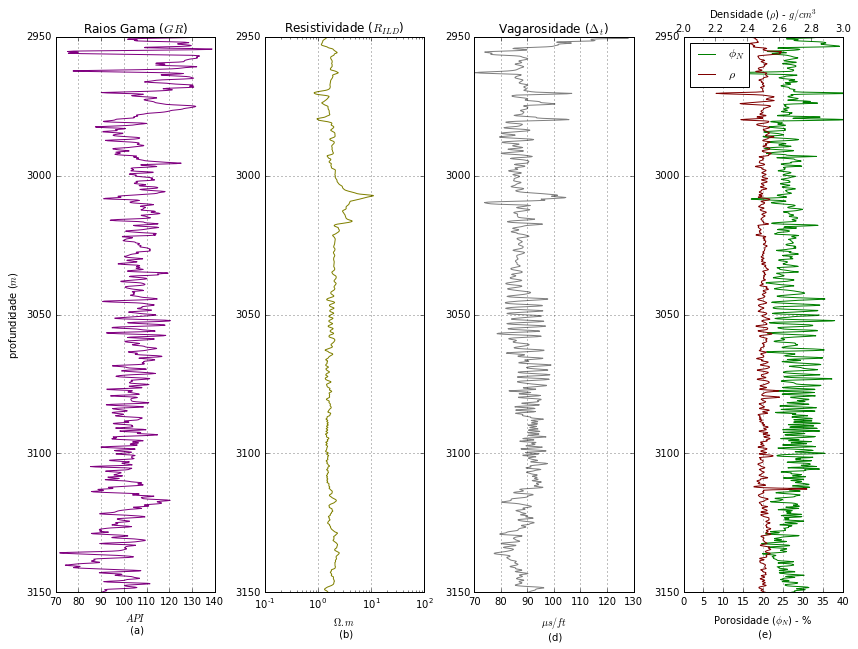

In [7]:
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.496265181279 media (IGR) - indice de raio gama
0.235787650483  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

9.56541256748  media (PHItd)%
17.4247303876  media (PHIsh)%
1068  ponto de folhelho (Psh)
-6.18996197059 = porosidade sh tabelada| 22.09737827715356 = porosidade sh calculada
8.19543913019 = porosidade D, tabelada| 11.4696756453 = porosidade D, calculada
19.1313077932 = porosidade S, tabelada| 26.3240673368 = porosidade, S calculada


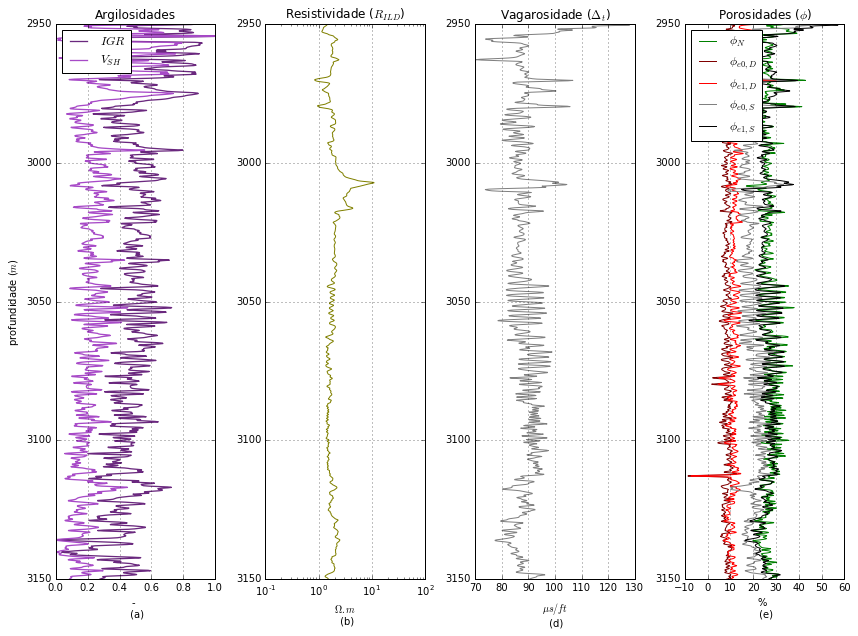

In [8]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh  - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

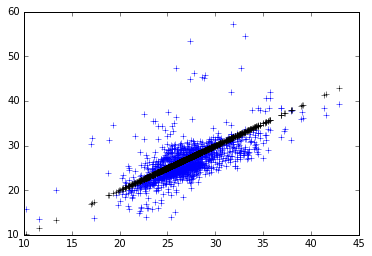

In [9]:
plt,plot(PHIN,PHIes1,'+b')
plt.plot(PHIN,PHIN,'+k')
plt.show()

rP  = 0.672937732601 |mP  = 149.463575949 |stdP  = 110.410365043
rE1 = 0.496006558682 |mE1 = 127.967988917 |stdE1 = 115.155155218
rE2 = 0.485607047593 |mE2 = 130.580555692 |stdE2 = 113.965856794

rNA02 0.199043796903
rRJS19 0.3260072967
rNA07 0.189816834146
rNA12 0.222249208147
rNA04 0.235723851704
rRJS42 0.259238489557


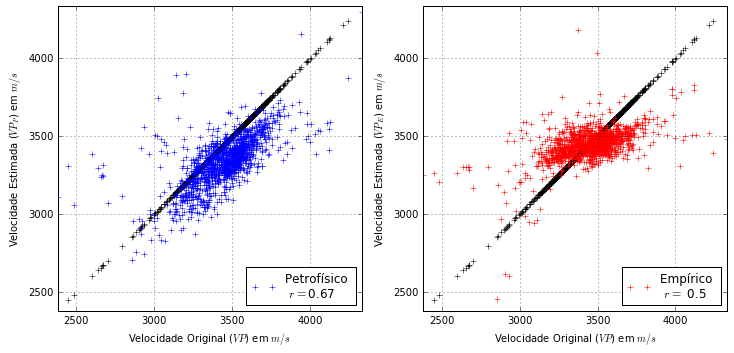

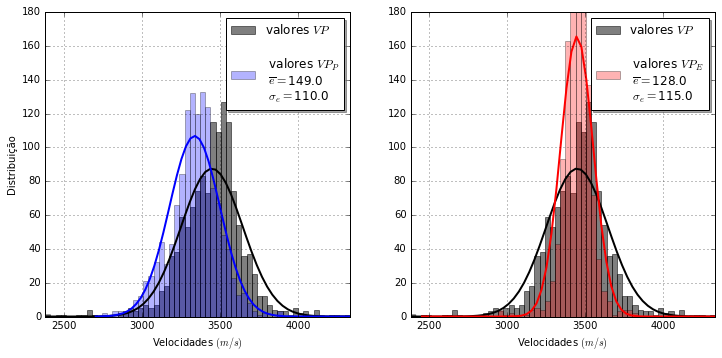

In [10]:
#---------------------------------------------------Estimando VP-------------------------------------------------#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))
#---------------------------------------------------------------
pet = u"- Petrofísico"; emp = u"- Empírico";petp = name1+pet;empp = name1+emp # nomeclatura
#------------------------------------------------Modelo Petrofisico----------------------------------------------#
DTPp = [];VPp=[];errorP = []
for i in range (p):
    DTPp0 = (DTPma + (DTPf - DTPma)*((PHIN[i]/100.0)));DTPp.append(DTPp0)
    VPp0 = (1.00/(cfvp*DTPp0));errorP.append(abs(VP[i]-VPp0));VPp.append(VPp0)

print('rP  =',np.corrcoef(VP,VPp)[0,1],'|mP  =',np.mean(errorP),'|stdP  =',np.std(errorP))
#--------------------------------------------------Modelo Empirico-----------------------------------------------#
VPe1=[];VPe2=[];VPe_02=[];VPe_07=[];VPe_12=[];VPe_04=[];VPe_RJS42=[];VPe_RJS19=[];errorE1=[];errorE2=[]

for i in range (p): # determinando VPa em ms
    VPe01=(1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2)))));errorE1.append(abs(VP[i]-VPe01))
    VPe1.append(VPe01)
    
    VPe02=(1000*(0.41*(RHOb[i]**2.32)))
    errorE2.append(abs(VP[i]-VPe02));VPe2.append(VPe02)
    
    1000*(3.90 - (5.07*PHIed1[i]/100.0) + (0.39*VSH[i]) + (ILD[i]*1.88*(10**(-2))))
    
    VPe_02.append(1000*(4.29 - (2.66*PHIed1[i]/100.0) - (1.78*VSH[i]) - (5.38*ILD[i]*(10**(-5)))))
    VPe_07.append(1000*(4.84 - (8.43*PHIed1[i]/100.0) - (5.52*VSH[i]) + (18.78*(PHIed1[i]/100.0)*VSH[i]) 
    + (8.94*((PHIed1[i]/100)**2)) + (2.25*VSH[i]**2)))
    VPe_12.append(1000*(4.28 - (5.63*PHIed1[i]/100.0) - (2.74*VSH[i]) + (9.24*(PHIed1[i]/100.0)*VSH[i]) 
    + 6.76*(PHIed1[i]/100.0)**2 + (0.85*(VSH[i])**2)))
    VPe_04.append(1000*(4.80 - (8.20*PHIed1[i]/100.0) - (4.31*VSH[i]) + (12.72*(PHIed1[i]/100.0)*VSH[i]) 
    + (10.42*((PHIed1[i]/100)**2)) + (2.57*VSH[i]**2)))
    VPe_RJS42.append(1000*(3.89 -(5.11*(PHIed1[i]/100.0)) - (0.82*VSH[i]) + (0.07*ILD[i]) 
    + (1.11*(PHIed1[i]/100.0)*VSH[i]) - (0.35*(PHIed1[i]/100.0)*ILD[i]) + ((9.16*(10**(-3)))*(VSH[i])*ILD[i])
    + (15.40*((PHIed1[i]/100)**2)) + (0.23*(VSH[i]**2)) - ((7.29*(10**(-4)))*(ILD[i]**2))))
    VPe_RJS19.append(1000*(4.63 - (9.82*PHIed1[i]/100) - (2.25*VSH[i]) + (0.08*ILD[i]) 
    + (4.06*(PHIed1[i]/100)*VSH[i]) - (0.22*(PHIed1[i]/100)*ILD[i]) + (0.00192*(VSH[i])*ILD[i]) 
    + (17.18*((PHIed1[i]/100)**2))+ (1.26*((VSH[i])**2)) - (0.000266*((ILD[i])**2))))

print('rE1 =',np.corrcoef(VP,VPe1)[0,1],'|mE1 =',np.mean(errorE1),'|stdE1 =',np.std(errorE1))
print('rE2 =',np.corrcoef(VP,VPe2)[0,1],'|mE2 =',np.mean(errorE2),'|stdE2 =',np.std(errorE2));print();
print('rNA02',np.corrcoef(VP,VPe_02)[0,1]);print('rRJS19',np.corrcoef(VP,VPe_RJS19)[0,1]);
print('rNA07',np.corrcoef(VP,VPe_07)[0,1]);print('rNA12',np.corrcoef(VP,VPe_12)[0,1]);
print('rNA04',np.corrcoef(VP,VPe_04)[0,1]);print('rRJS42',np.corrcoef(VP,VPe_RJS42)[0,1])
#-----------------------------------------------------Graficos--------------------------------------------------#
fig = plt.figure(figsize= (12,12))

scatterP=u'Petrofísico \n $r=$'+str(round(np.corrcoef(VP,VPp)[0,1],2));
scatterE=u'Empírico \n $r =$ '+str(round(np.corrcoef(VP,VPe1)[0,1],2))

ax1=plt.subplot(221);ax1.plot(VP,VP,'+k');ax1.plot(VP,VPp,'+b',label=scatterP);legend=ax1.legend(loc=4)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP))
plt.xlabel('Velocidade Original ($VP$) em $m/s$');plt.ylabel('Velocidade Estimada ($VP_P$) em $m/s$');plt.grid()

ax2=plt.subplot(222);ax2.plot(VP,VP,'+k');ax2.plot(VP,VPe1,'+r',label=scatterE);legend=ax2.legend(loc=4)
plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=max(VP),ymin=min(VP));
plt.xlabel('Velocidade Original ($VP$) em $m/s$');plt.ylabel('Velocidade Estimada ($VP_E$) em $m/s$');plt.grid()

plt.show();name_sca_0 = '../../mario_tese/Figs/pocos/na'+name0+'scatterplot.png'
fig.savefig(name_sca_0, dpi=100, transparent=True, bbox_inches='tight')
#----------------------------------------------------Histograma-------------------------------------------------#
bins_s=60;bins_vp = np.linspace(min(VP), max(VP), bins_s)

label_hist_e = '\n valores $VP_E$ \n $\overline{e} =$'+str(round(np.mean(errorE1))) \
+'\n $\sigma_e =$'+str(round(np.std(errorE1)));label_hist_p = '\n valores $VP_P$ \n $\overline{e} =$' \
+str(round(np.mean(errorP)))+'\n $\sigma_e =$'+str(round(np.std(errorP)))
#-----------------------------------------------------------------------------------------------------#
X_VP  = np.linspace(min(VP), max(VP),bins_s)
dx_VP = np.histogram(VP ,bins=bins_vp)[1][1] - np.histogram(VP ,bins=bins_vp)[1][0]
Y_VP  = mlab.normpdf(np.linspace(min(VP),max(VP),bins_s),np.mean(VP),np.sqrt(np.var(VP)))*len(VP)*dx_VP
#-------------------------------------------------------------------------------------------------------------#
X_VPe  = np.linspace(min(VPe1), max(VPe1),bins_s)
dx_VPe = np.histogram(VPe1,bins=bins_vp)[1][1] - np.histogram(VPe1 ,bins=bins_vp)[1][0]
Y_VPe  = mlab.normpdf(np.linspace(min(VPe1),max(VPe1),bins_s),np.mean(VPe1),np.sqrt(np.var(VPe1)))*len(VPe1)*dx_VPe
#-------------------------------------------------------------------------------------------------------------#
X_VPp  = np.linspace(min(VPp), max(VPp),bins_s)
dx_VPp = np.histogram(VPp ,bins=bins_vp)[1][1] - np.histogram(VPp ,bins=bins_vp)[1][0]
Y_VPp  = mlab.normpdf(np.linspace(min(VPp),max(VPp),bins_s),np.mean(VPp),np.sqrt(np.var(VPp)))*len(VPp)*dx_VPp
#-------------------------------------------------------------------------------------------------------------#
fig = plt.figure(figsize= (12,12))

ax1 = plt.subplot(221)
ax1.hist(VP,bins_vp,histtype='bar',stacked=True,color='k',alpha=0.5,label='valores $VP$')
ax1.plot(X_VP,Y_VP,linewidth=2,color='k')
ax1.hist(VPp , bins_vp, histtype='bar', stacked=True, color='b', alpha=0.3,label=label_hist_p)
ax1.plot(X_VPp,Y_VPp,linewidth = 2, color='b')
plt.xlabel('Velocidades $(m / s)$');plt.ylabel(u'Distribuição');plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP));
plt.ylim(ymax=180,ymin=0);legend = ax1.legend(loc=1, shadow=True)

ax2 = plt.subplot(222)
ax2.hist(VP , bins_vp, histtype='bar', stacked=True, color='k', alpha=0.5,label='valores $VP$')
ax2.plot(X_VP ,Y_VP ,linewidth = 2, color='k')
ax2.hist(VPe1 , bins_vp, histtype='bar', stacked=True, color='r', alpha=0.3,label=label_hist_e)
ax2.plot(X_VPe,Y_VPe,linewidth = 2, color='r')
plt.xlabel('Velocidades $(m / s)$');plt.grid();plt.xlim(xmax=max(VP),xmin=min(VP));plt.ylim(ymax=180,ymin=0)
legend = ax2.legend(loc=1, shadow=True)

plt.show()